<font color="DD740A">
<h1>Curso de Machine Learning con Python</h1> 
<h3>Tema7: Machine Learning con Python</h3>
<h4>EJERCICIO FINAL: BANK MARKETING (Solución)</h4>
</font>    

*Autor: ITI*<br>
*Copyright 2020 Instituto Tecnológico de Informática (ITI). Prohibida la reproducción total o parcial sin permiso del ITI*

# OBJETIVO DEL EJERCICIO
- Predecir si el cliente se suscribirá al depósito bancario (target: deposit)

<b>Dataset: BANK_FULL</b>

Abstract: The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Data Set Information: The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

- Diccionario de datos: https://www.kaggle.com/henriqueyamahata/bank-marketing

<b>Bank client data:</b><br>
- Age (numeric)
- Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
- Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
- Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
- Balance: Economic balance of the person
- Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
- Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
- Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

<b>Related with the last contact of the current campaign:</b><br>
- Contact: contact communication type (categorical: 'cellular','telephone')
- Month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- Day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then deposit='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call deposit is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

<b>Other attributes:</b><br>
- Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- Previous: number of contacts performed before this campaign and for this client (numeric)
- Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

<b>Output variable (desired target):</b><br>
- Deposit: has the client subscribed a term deposit? (binary: 'yes', 'no')

## Funciones de pre-procesado (Ejecutar celda)

In [17]:
def age_(data):
    
    data['Adult'] = 0
    data['Middle_Aged'] = 0
    data['old'] = 0    
    data.loc[(data['age'] <= 35) & (data['age'] >= 18),'Adult'] = 1
    data.loc[(data['age'] <= 60) & (data['age'] >= 36),'Middle_Aged'] = 1
    #data.loc[(data['age'] <= 60) & (data['age'] >= 46),'Elderly'] = 1
    data.loc[data['age'] >=61,'old'] = 1
    
    return data

def campaign_(data):
    
    
    data.loc[data['campaign'] == 1,'campaign'] = 1
    data.loc[(data['campaign'] >= 2) & (data['campaign'] <= 3),'campaign'] = 2
    data.loc[data['campaign'] >= 4,'campaign'] = 3
    
    return data

def duration_(data):
    
    data['t_min'] = 0
    data['t_e_min'] = 0
    data['e_min']=0
    data.loc[data['duration'] <= 5,'t_min'] = 1
    data.loc[(data['duration'] > 5) & (data['duration'] <= 10),'t_e_min'] = 1
    data.loc[data['duration'] > 10,'e_min'] = 1
    
    return data

def pdays_(data):
    data['pdays_not_contacted'] = 0
    data['months_passed'] = 0
    data.loc[data['pdays'] == -1 ,'pdays_not_contacted'] = 1
    data['months_passed'] = data['pdays']/30
    data.loc[(data['months_passed'] >= 0) & (data['months_passed'] <=2) ,'months_passed'] = 1
    data.loc[(data['months_passed'] > 2) & (data['months_passed'] <=6),'months_passed'] = 2
    data.loc[data['months_passed'] > 6 ,'months_passed'] = 3
    
    return data

def previous_(data):
    
    data['Not_Contacted'] = 0
    data['Contacted'] = 0
    data.loc[data['previous'] == 0 ,'Not_Contacted'] = 1
    data.loc[(data['previous'] >= 1) & (data['pdays'] <=99) ,'Contacted'] = 1
    data.loc[data['previous'] >= 100,'Contacted'] = 2
    
    return data

def balance_(data):
    data['Neg_Balance'] = 0
    data['No_Balance'] = 0
    data['Pos_Balance'] = 0
    
    data.loc[data['balance']<0,'Neg_Balance'] = 1
    data.loc[data['balance'] == 0,'No_Balance'] = 1
    data.loc[(data['balance'] >= 1) & (data['balance'] <= 100),'Pos_Balance'] = 1
    data.loc[(data['balance'] >= 101) & (data['balance'] <= 500),'Pos_Balance'] = 2
    data.loc[(data['balance'] >= 501) & (data['balance'] <= 2000),'Pos_Balance'] = 3
    data.loc[(data['balance'] >= 2001) & (data['balance'] <= 10000),'Pos_Balance'] = 4
    data.loc[data['balance'] >= 10001,'Pos_Balance'] = 5
    
    return data

def job_(data):
    
    data.loc[data['job'] == "management",'job'] = 1
    data.loc[data['job'] == "technician",'job'] = 2
    data.loc[data['job'] == "entrepreneur",'job'] = 3
    data.loc[data['job'] == "blue-collar",'job'] = 4
    data.loc[data['job'] == "retired",'job'] = 5
    data.loc[data['job'] == "admin.",'job'] = 6
    data.loc[data['job'] == "services",'job'] = 7
    data.loc[data['job'] == "self-employed",'job'] = 8
    data.loc[data['job'] == "unemployed",'job'] = 9
    data.loc[data['job'] == "student",'job'] = 10
    data.loc[data['job'] == "housemaid",'job'] = 11
    data.loc[data['job'] == "unknown",'job'] = 12
    
    return data

def marital_(data):
    
    data['married'] = 0
    data['singles'] = 0
    data['divorced'] = 0
    data.loc[data['marital'] == 'married','married'] = 1
    data.loc[data['marital'] == 'singles','singles'] = 1
    data.loc[data['marital'] == 'divorced','divorced'] = 1
    
    return data

def education_(data):
    
    data['primary'] = 0
    data['secondary'] = 0
    data['tertiary'] = 0
    data['unknown'] = 0
    data.loc[data['education'] == 'primary','primary'] = 1
    data.loc[data['education'] == 'secondary','secondary'] = 1
    data.loc[data['education'] == 'tertiary','tertiary'] = 1
    data.loc[data['education'] == 'unknown','unknown'] = 1    
    
    return data

## Funciones customizadas para calcular las métricas de clasificación (Ejecutar celda)

In [34]:
def acc_score(model):
    k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
    return np.mean(cross_val_score(model,X_train,y_train,cv=k_fold,scoring="accuracy"))

def confusion_matrix_model(model_used):
    cm=confusion_matrix(y_test,model_used.predict(X_test))
    col=["Predicted Negative","Predicted Positive"]
    cm=pd.DataFrame(cm)
    cm.columns=["Predicted Negative","Predicted Positive"]
    cm.index=["Actual Negative","Actual Positive"]
    #cm[col]=np.around(cm[col].div(cm[col].sum(axis=1),axis=0),decimals=2)
    return cm

def aucscore(model,has_proba=True):
    roc_auc = roc_auc_score(y_test, model.predict(X_test))
    return roc_auc

def plt_roc_curve(name,model,has_proba=True):
    roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label= name + ' (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

def importance_of_features(model):
    features = pd.DataFrame()
    features['feature'] = X_train.columns
    features['importance'] = model.feature_importances_
    features.sort_values(by=['importance'], ascending=True, inplace=True)
    features.set_index('feature', inplace=True)
    return features.plot(kind='barh', figsize=(10,10)),


def print_model_report(name,model):
    
    print(BOLD + '\n Informe de Resultados del modelo: ' + name +' \n'+ NO_BOLD)
    
    print(BOLD + '\n Precisión del modelo:\n' + NO_BOLD)
    print('Accuracy de '+name+' en train: ' + str(acc_score(model)))
    print('Accuracy de '+name+' en test: {:.2f}'.format(model.score(X_test, y_test)))

    #from sklearn.metrics import confusion_matrix
    print(BOLD + '\n Matriz de confusión:\n' + NO_BOLD)
    print(confusion_matrix_model(model))

    
    from sklearn.metrics import classification_report
    print(BOLD + '\n Resultados: \n' + NO_BOLD)
    print(classification_report(y_test, y_pred))

    ## Plot ROC Curve
    print(BOLD + '\n Curva ROC: \n' + NO_BOLD)
    plt_roc_curve(name ,model)
    
def compare_real_pred(dataframe, target, X_test, y_pred):
    # Comparativa de las predicciones frente a la realidad
    df_comparative = dataframe.loc[X_test.index]
    df_comparative['Predicción'] = y_pred
    df_comparative['Modelo Acierta'] = df_comparative[target] == df_comparative['Predicción']
    return df_comparative

# Importar librerías

In [3]:
# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.model_selection import KFold

# Variables globales
BOLD = '\033[1m'
NO_BOLD = '\033[0m'

# Directorio del Datawarehouse 

In [5]:
os.getcwd()

'C:\\Users\\aulafor\\Desktop\\b\\scripts'

In [7]:
cd Desktop/b/Data/

C:\Users\aulafor\Desktop\b\Data


In [14]:
df = pd.read_csv("bank_full.csv",delimiter=";")

In [15]:
df

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
0        unknown    5   may       261         1     -1         0  unknown   
1        unknown    5   may       151         1     -1         0  unknown   
2        unknown    5   may        76         1     -1         0  unknown   
3        unknown    5   may        92         1     -1         0  unknown   
4        unknown    5   may       198         1     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
45206   cellular   17   nov       977         3     -1         0  unknown   
45207   cellular   17   nov       456         2     -1         0  unknown   
45208   cellular   17   nov      1127         5    184         3  success   
45209  telephone   17   nov       508         4     -1         0  unknown   
45210   cellular   17   nov       361         2    188        11    other   

      deposit  
0          no  
1          no  
2          no  
3          no  
4          no  
...       ...  
45206     yes  
45207     yes  
45208     yes  
45209      no  
45210      no  

[45211 rows x 17 columns]

# Exploratory Data Analysis

In [9]:
import pandas_profiling as pdprof

In [18]:
df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [16]:
profile = pdprof.ProfileReport(df)
profile

# PRE-PROCESADO DE DATOS

## Filtrado de variables

- Poutcome: se refiere al resultado anterior de la campaña de marketing y tiene tres resultados válidos: Éxito, Fracaso e Inexistente según el conjunto de datos proporcionado por UCI. 'unknown' no es uno de ellos y  está ampliamente presente en el conjunto de datos y no agrega valor a la muestra. No es útil mantener variables que son altamente desconocidas y cuyos efectos no pueden verse en la variable dependiente
- Duration: esta entrada solo debe incluirse con fines de referencia y debe descartarse si la intención es tener un modelo predictivo realista


In [19]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [23]:
# me cargo estas dos pues
df.drop(['poutcome','duration'], axis=1, inplace=True)

## Codificación de variables

In [25]:
df_pre = df.copy()

In [26]:
df_pre.deposit.replace(('yes', 'no'), (1, 0), inplace=True)
df_pre.default.replace(('yes','no'),(1,0),inplace=True)
df_pre.housing.replace(('yes','no'),(1,0),inplace=True)
df_pre.loan.replace(('yes','no'),(1,0),inplace=True)
df_pre.marital.replace(('married','single','divorced'),(1,2,3),inplace=True)
df_pre.contact.replace(('telephone','cellular','unknown'),(1,2,3),inplace=True)
df_pre.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)
df_pre.education.replace(('primary','secondary','tertiary','unknown'),(1,2,3,4),inplace=True)

## Features Engineering

- Utilizar las funciones de pre-procesado: 
campaign_, age_, education_, balance_, job_, previous_, marital_

In [28]:
#age_(df_pre)
campaign_(df_pre)
education_(df_pre) 
balance_(df_pre)
job_(df_pre)
previous_(df_pre)
marital_(df_pre)

age job  marital  education  default  balance  housing  loan  contact  \
0       58   1        1          3        0     2143        1     0        3   
1       44   2        2          2        0       29        1     0        3   
2       33   3        1          2        0        2        1     1        3   
3       47   4        1          4        0     1506        1     0        3   
4       33  12        2          4        0        1        0     0        3   
...    ...  ..      ...        ...      ...      ...      ...   ...      ...   
45206   51   2        1          3        0      825        0     0        2   
45207   71   5        3          1        0     1729        0     0        2   
45208   72   5        1          2        0     5715        0     0        2   
45209   57   4        1          2        0      668        0     0        1   
45210   37   3        1          2        0     2971        0     0        2   

       day  ...  tertiary  unknown  Neg_Balance  No_Balance  Pos_Balance  \
0        5  ...         0        0            0           0            4   
1        5  ...         0        0            0           0            1   
2        5  ...         0        0            0           0            1   
3        5  ...         0        0            0           0            3   
4        5  ...         0        0            0           0            1   
...    ...  ...       ...      ...          ...         ...          ...   
45206   17  ...         0        0            0           0            3   
45207   17  ...         0        0            0           0            3   
45208   17  ...         0        0            0           0            4   
45209   17  ...         0        0            0           0            3   
45210   17  ...         0        0            0           0            4   

       Not_Contacted  Contacted  married  singles  divorced  
0                  1          0        0        0         0  
1                  1          0        0        0         0  
2                  1          0        0        0         0  
3                  1          0        0        0         0  
4                  1          0        0        0         0  
...              ...        ...      ...      ...       ...  
45206              1          0        0        0         0  
45207              1          0        0        0         0  
45208              0          0        0        0         0  
45209              1          0        0        0         0  
45210              0          0        0        0         0  

[45211 rows x 30 columns]

In [29]:
df_pre.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous',
       'deposit', 'Adult', 'Middle_Aged', 'old', 'primary', 'secondary',
       'tertiary', 'unknown', 'Neg_Balance', 'No_Balance', 'Pos_Balance',
       'Not_Contacted', 'Contacted', 'married', 'singles', 'divorced'],
      dtype='object')

# MODELADO

### Logistic regression

In [30]:
#### Importar la librería 

from sklearn.linear_model import LogisticRegression


 Informe de Resultados del modelo: Logistic Regression 


 Precisión del modelo:

Accuracy de Logistic Regression en train: 0.8833222618309218
Accuracy de Logistic Regression en test: 0.88

 Matriz de confusión:

                 Predicted Negative  Predicted Positive
Actual Negative                7906                  46
Actual Positive                1078                  13

 Resultados: 

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      7952
           1       0.22      0.01      0.02      1091

    accuracy                           0.88      9043
   macro avg       0.55      0.50      0.48      9043
weighted avg       0.80      0.88      0.82      9043


 Curva ROC: 



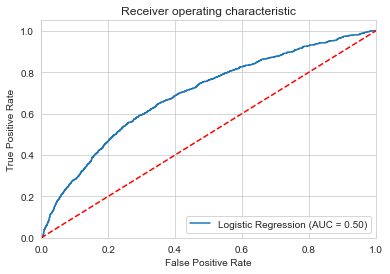

In [32]:
########################### Regresión logística ###########################

df = df_pre.copy()
target = 'deposit'

### Seleccionamos las features (X) y el target (y)
X = df.drop(target, axis = 'columns')
y = df.loc[:,target]

### Dividir los datos en training/test (80-20) con shuffle automático
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) # Realiza un shuffle automático

### Creamos el objeto del modelo específico
reglog = LogisticRegression()

### Entrenamos el modelo con los datos conocidos
reglog.fit(X_train,y_train)

### Predecimos con los datos a futuro (datos nunca vistos)
y_pred = reglog.predict(X_test)

### Visualizamos los resultados del modelo
print_model_report('Logistic Regression', reglog)

### Almacenamos la métrica del modelo
auc_reglog = aucscore(reglog)


In [35]:
compare_real_pred(df_pre, target, X_test, y_pred)['Modelo Acierta'].sum()

7919

### K Neighbors

In [36]:
#### Importar la librería 

from sklearn.neighbors import KNeighborsClassifier


 Informe de Resultados del modelo: K Neighbors 


 Precisión del modelo:

Accuracy de K Neighbors en train: 0.8771565377422414
Accuracy de K Neighbors en test: 0.88

 Matriz de confusión:

                 Predicted Negative  Predicted Positive
Actual Negative                7794                 158
Actual Positive                 965                 126

 Resultados: 

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      7952
           1       0.44      0.12      0.18      1091

    accuracy                           0.88      9043
   macro avg       0.67      0.55      0.56      9043
weighted avg       0.84      0.88      0.84      9043


 Curva ROC: 



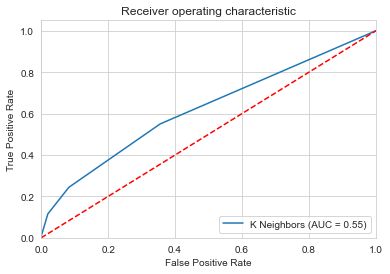

In [38]:
########################### KNN - Vecinos Próximos ###########################

df = df_pre.copy()
target = 'deposit'

### Seleccionamos las features (X) y el target (y)
X = df.drop(target, axis = 'columns')
y = df.loc[:,target]

### Dividir los datos en training/test (80-20) con shuffle automático
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) # Realiza un shuffle automático

### Creamos el objeto del modelo específico
knn = KNeighborsClassifier(n_neighbors=5)

### Entrenamos el modelo con los datos conocidos
knn.fit(X_train,y_train)

### Predecimos con los datos a futuro (datos nunca vistos)
y_pred = knn.predict(X_test)

### Visualizamos los resultados del modelo
print_model_report('K Neighbors', knn)

### Almacenamos la métrica del modelo
auc_knn = aucscore(knn)

In [39]:
# Selección de mejores hiperparámetros de forma manual

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
name = "knn(1)"
print('AUC de '+name+': {:.2f}'.format(aucscore(knn)))

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
name = "knn(3)"
print('AUC de '+name+': {:.2f}'.format(aucscore(knn)))

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
name = "knn(5)"
print('AUC de '+name+': {:.2f}'.format(aucscore(knn)))

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
name = "knn(7)"
print('AUC de '+name+': {:.2f}'.format(aucscore(knn)))

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
name = "knn(9)"
print('AUC de '+name+': {:.2f}'.format(aucscore(knn)))

knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
name = "knn(5), distance "
print('AUC de '+name+': {:.2f}'.format(aucscore(knn)))

knn = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
name = "knn(5), ball_tree "
print('AUC de '+name+': {:.2f}'.format(aucscore(knn)))

knn = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
name = "knn(5), kd_tree "
print('AUC de '+name+': {:.2f}'.format(aucscore(knn)))

knn = KNeighborsClassifier(n_neighbors=5, algorithm='brute')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
name = "knn(5), brute "
print('AUC de '+name+': {:.2f}'.format(aucscore(knn)))


print(BOLD +'\nEl modelo con mayor precisión es: Knn(5) con algoritmo de computación de vecinos ball tree' +NO_BOLD)



AUC de knn(1): 0.56
AUC de knn(3): 0.55
AUC de knn(5): 0.55
AUC de knn(7): 0.53
AUC de knn(9): 0.53
AUC de knn(5), distance : 0.55
AUC de knn(5), ball_tree : 0.55
AUC de knn(5), kd_tree : 0.55
AUC de knn(5), brute : 0.55

El modelo con mayor precisión es: Knn(5) con algoritmo de computación de vecinos ball tree



 Informe de Resultados del modelo: KNN 


 Precisión del modelo:

Accuracy de KNN en train: 0.8771565415646141
Accuracy de KNN en test: 0.88

 Matriz de confusión:

                 Predicted Negative  Predicted Positive
Actual Negative                7793                 159
Actual Positive                 965                 126

 Resultados: 

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      7952
           1       0.44      0.12      0.18      1091

    accuracy                           0.88      9043
   macro avg       0.67      0.55      0.56      9043
weighted avg       0.84      0.88      0.84      9043


 Curva ROC: 



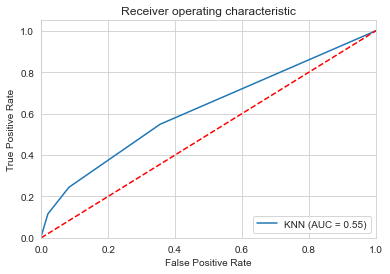

In [40]:
# Almacenamos la métrica del modelo Knn más óptimo

knn = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
knn.fit(X_train,y_train)
print_model_report('KNN', knn)

auc_knn = aucscore(knn)

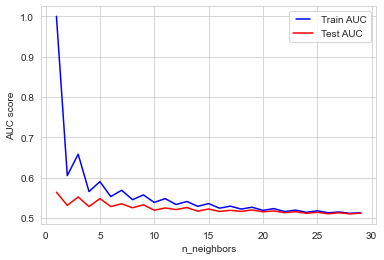

In [41]:
# Búsqueda del k más óptimo de manera automática

neighbors = list(range(1,30))
train_results = []
test_results = []
for n in neighbors:
   model = KNeighborsClassifier(n_neighbors=n)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(neighbors, train_results, 'b', label='Train AUC')
line2, = plt.plot(neighbors, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_neighbors')
plt.show()

## NAIVE BAYES

In [42]:
#### Importar la librería 
from sklearn.naive_bayes import GaussianNB


 Informe de Resultados del modelo: Naive Bayes 


 Precisión del modelo:

Accuracy de Naive Bayes en train: 0.8294901554983245
Accuracy de Naive Bayes en test: 0.82

 Matriz de confusión:

                 Predicted Negative  Predicted Positive
Actual Negative                7038                 914
Actual Positive                 718                 373

 Resultados: 

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      7952
           1       0.29      0.34      0.31      1091

    accuracy                           0.82      9043
   macro avg       0.60      0.61      0.60      9043
weighted avg       0.83      0.82      0.83      9043


 Curva ROC: 



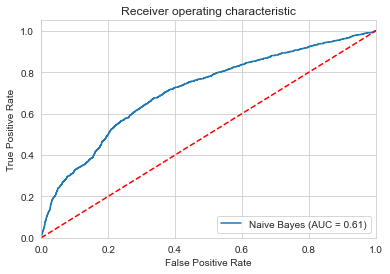

In [43]:
########################### Naive Bayes ###########################
df = df_pre.copy()
target = 'deposit'

### Seleccionamos las features (X) y el target (y)
X = df.drop(target, axis = 'columns')
y = df.loc[:,target]

### Dividir los datos en training/test (80-20) con shuffle automático
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) # Realiza un shuffle automático

### Creamos el objeto del modelo específico
nb = GaussianNB()

### Entrenamos el modelo con los datos conocidos
nb.fit(X_train,y_train)

### Predecimos con los datos a futuro (datos nunca vistos)
y_pred = nb.predict(X_test)

### Visualizamos los resultados del modelo
print_model_report('Naive Bayes', nb)

### Almacenamos la métrica del modelo
auc_nb = aucscore(nb)


### Decision Tree

In [46]:
#### Importar la librería 
from sklearn.tree import DecisionTreeClassifier


 Informe de Resultados del modelo: Decision Tree 


 Precisión del modelo:

Accuracy de Decision Tree en train: 0.8277482582307819
Accuracy de Decision Tree en test: 0.83

 Matriz de confusión:

                 Predicted Negative  Predicted Positive
Actual Negative                7145                 807
Actual Positive                 774                 317

 Resultados: 

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      7952
           1       0.28      0.29      0.29      1091

    accuracy                           0.83      9043
   macro avg       0.59      0.59      0.59      9043
weighted avg       0.83      0.83      0.83      9043


 Curva ROC: 



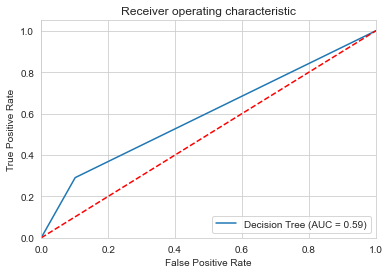

In [47]:
########################### ÁRBOLES DE DECISIÓN - CLASIFICACIÓN ###########################

df = df_pre.copy()
target = 'deposit'

### Seleccionamos las features (X) y el target (y)
X = df.drop(target, axis = 'columns')
y = df.loc[:,target]

### Dividir los datos en training/test (80-20) con shuffle automático
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) # Realiza un shuffle automático

### Creamos el objeto del modelo específico
Dec_tree = DecisionTreeClassifier()

### Entrenamos el modelo con los datos conocidos
Dec_tree.fit(X_train,y_train)

### Predecimos con los datos a futuro (datos nunca vistos)
y_pred = Dec_tree.predict(X_test)

### Visualizamos los resultados del modelo
print_model_report('Decision Tree', Dec_tree)

### Almacenamos la métrica del modelo
auc_tree = aucscore(Dec_tree)
 

(<matplotlib.axes._subplots.AxesSubplot at 0x19fb8967dc0>,)

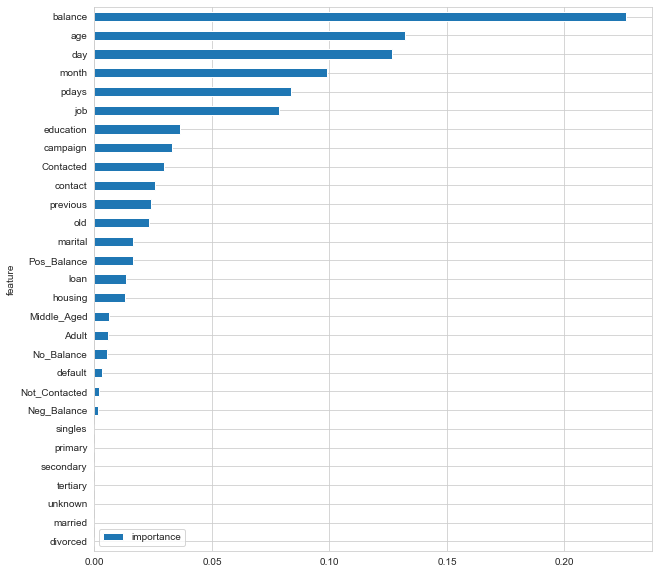

In [48]:
# Visualizar la importancia de cada variable
importance_of_features(Dec_tree)

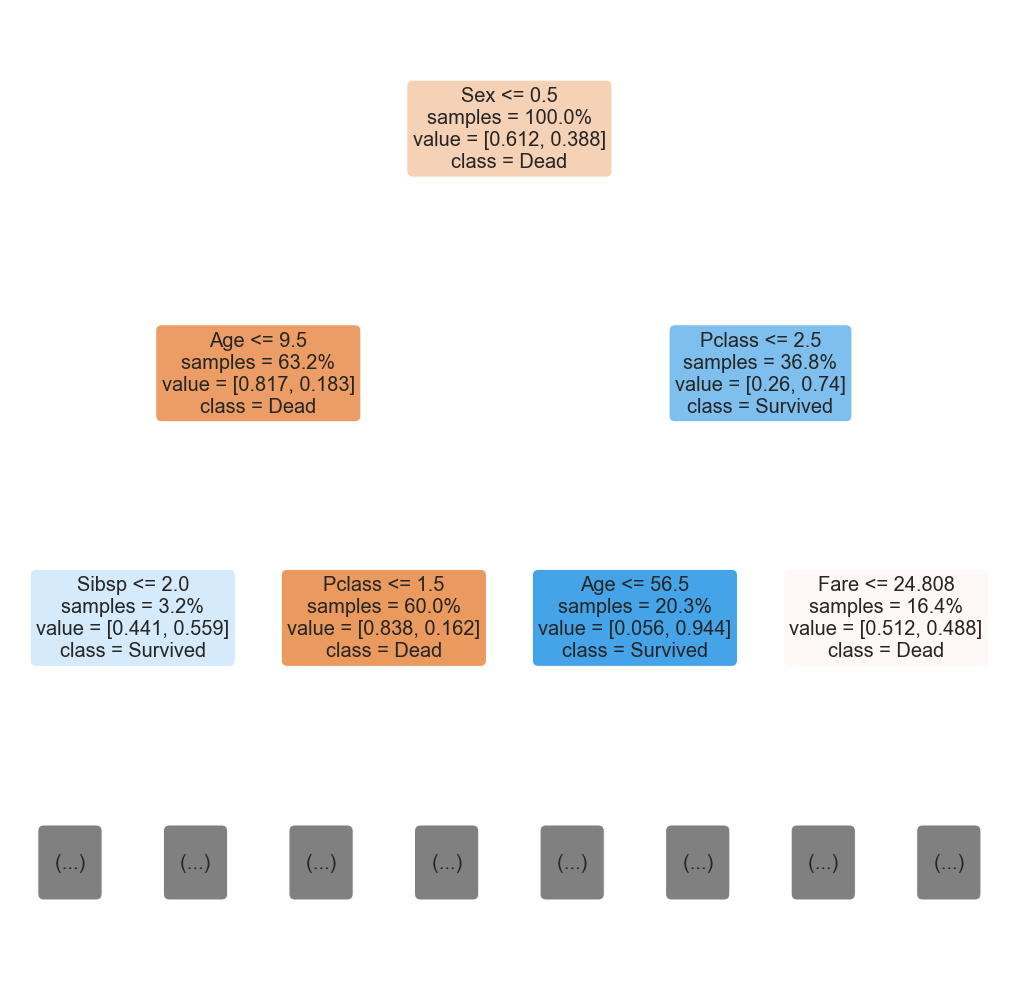

In [64]:
# Visualizar el árbol

from sklearn import tree

plt.figure(figsize=(18,18))
tree.plot_tree(Dec_tree, feature_names = X_train.columns, class_names=(['Dead','Survived']) ,filled=True, max_depth= 2,impurity=False, fontsize=20, rounded=True, proportion=True)
#tree.plot_tree(Dec_tree, feature_names = X_train.columns, class_names=True,filled=True, max_depth= 2,impurity=False, fontsize=20)

plt.show()

In [49]:
# Criterion: gini, entropy

tree = DecisionTreeClassifier(criterion='gini',random_state=42)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
name = "tree(gini): "
print('AUC de '+name + str(aucscore(tree)))

tree = DecisionTreeClassifier(criterion='entropy',random_state=42)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
name = "tree(entropy): "
print('AUC de '+name + str(aucscore(tree)))


AUC de tree(gini): 0.6003515363491674
AUC de tree(entropy): 0.5990758367805366


In [50]:
# Splitter: best, random

tree = DecisionTreeClassifier(splitter='best')
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
name = "tree(best): "
print('AUC de '+name + str(aucscore(tree)))

tree = DecisionTreeClassifier(splitter='random')
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
name = "tree(random): "
print('AUC de '+name + str(aucscore(tree)))

AUC de tree(best): 0.595705707664871
AUC de tree(random): 0.5932995429036179


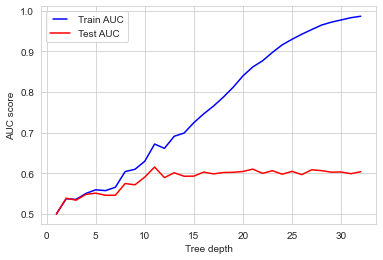

In [51]:
# max_depth

# The first parameter to tune is max_depth. 
# This indicates how deep the tree can be. 
# The deeper the tree, the more splits it has and it captures more information about the data. 
# We fit a decision tree with depths ranging from 1 to 32 and plot the training and test auc scores.

max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

# We see that our model overfits for large depth values. 
# The tree perfectly predicts all of the train data, however, it fails to generalize the findings for new data

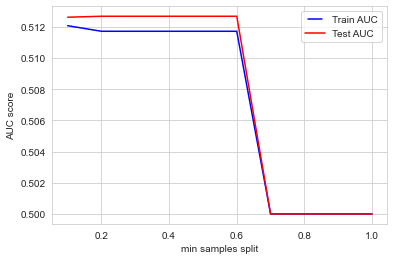

In [52]:
# min_samples_split

# min_samples_split represents the minimum number of samples required to split an internal node. 
# This can vary between considering at least one sample at each node to considering all of the samples at each node. 
# When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node. Here we will vary the parameter from 10% to 100% of the samples

min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

# We can clearly see that when we consider 100% of the samples at each node, the model cannot learn enough about the data. 
# This is an underfitting case.

In [53]:
# Almacenamos la métrica obtenida con el árbol más óptimo: max_depth=3, min_samples_split = 0.4, splitter='random'

# Entrenamos el árbol óptimo 
Dec_tree = DecisionTreeClassifier(max_depth=3, min_samples_split = 0.4, splitter='random')
Dec_tree.fit(X_train,y_train)
y_pred = Dec_tree.predict(X_test)

name = "tree(max_depth=3, min_samples_split = 0.4, splitter='random): "
print('AUC de '+name + str(aucscore(tree)))

# Almacenamos la métrica btenida con el árbol óptimo
auc_Dec_tree = aucscore(Dec_tree)

AUC de tree(max_depth=3, min_samples_split = 0.4, splitter='random): 0.5932995429036179


# (III) MODELOS BLACK BOX

## REDES NEURONALES ARTIFICIALES

In [54]:
#### Importar la librería 
from sklearn.neural_network import MLPClassifier


 Informe de Resultados del modelo: Neural Network 


 Precisión del modelo:

Accuracy de Neural Network en train: 0.8810826075507684
Accuracy de Neural Network en test: 0.87

 Matriz de confusión:

                 Predicted Negative  Predicted Positive
Actual Negative                7885                  67
Actual Positive                1080                  11

 Resultados: 

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      7952
           1       0.14      0.01      0.02      1091

    accuracy                           0.87      9043
   macro avg       0.51      0.50      0.48      9043
weighted avg       0.79      0.87      0.82      9043


 Curva ROC: 



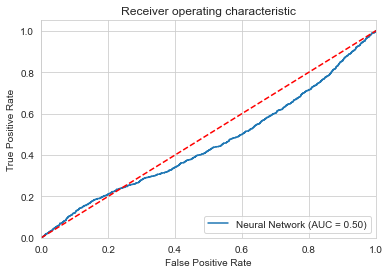

In [55]:
########################### Redes Neuronales Artificiales - Multilayer Perceptron (MLP) ###########################

df = df_pre.copy()
target = 'deposit'

### Seleccionamos las features (X) y el target (y)
X = df.drop(target, axis = 'columns')
y = df.loc[:,target]

### Dividir los datos en training/test (80-20) con shuffle automático
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) # Realiza un shuffle automático

### Creamos el objeto del modelo específico
nn = MLPClassifier()

### Entrenamos el modelo con los datos conocidos
nn.fit(X_train,y_train)

### Predecimos con los datos a futuro (datos nunca vistos)
y_pred = nn.predict(X_test)

### Visualizamos los resultados del modelo
print_model_report('Neural Network', nn)

### Almacenamos la métrica del modelo
auc_nn = aucscore(nn)


### Ajustando/Tuneando  la red neuronal

In [56]:
# Selección de los mejores hiperparámetros
## Modelo por defecto:

# MLPClassifier(hidden_layer_sizes=(100, ), 
#               activation=’relu’, 
#               solver=’adam’, 
#               alpha=0.0001, 
#               batch_size=’auto’, 
#               learning_rate=’constant’, 
#               learning_rate_init=0.001, 
#               power_t=0.5, 
#               max_iter=200, 
#               shuffle=True, 
#               random_state=None, 
#               tol=0.0001, 
#               verbose=False, 
#               warm_start=False, 
#               momentum=0.9, 
#               nesterovs_momentum=True, 
#               early_stopping=False, 
#               validation_fraction=0.1, 
#               beta_1=0.9, 
#               beta_2=0.999, 
#               epsilon=1e-08, 
#               n_iter_no_change=10
#              )



nn = MLPClassifier(activation='identity',random_state=42)
nn.fit(X_train,y_train)
y_pred = nn.predict(X_test)
name = "nn(identity): "
print('AUC de '+name + str(aucscore(nn)))

nn = MLPClassifier(activation='logistic',random_state=42)
nn.fit(X_train,y_train)
y_pred = nn.predict(X_test)
name = "nn(logistic): "

print('AUC de '+name + str(aucscore(nn)))
nn = MLPClassifier(activation='tanh',random_state=42)
nn.fit(X_train,y_train)
y_pred = nn.predict(X_test)
name = "nn(tanh): "

print('AUC de '+name + str(aucscore(nn)))
nn = MLPClassifier(activation='relu',random_state=42)
nn.fit(X_train,y_train)
y_pred = nn.predict(X_test)
name = "nn(relu): "
print('AUC de '+name + str(aucscore(nn)))

AUC de nn(identity): 0.5354379369710471
AUC de nn(logistic): 0.5218555835471121
AUC de nn(tanh): 0.5010604991083071
AUC de nn(relu): 0.5557636607915135


In [57]:
# Almacenamos la métrica obtenida con la MLP más óptima: activation='tanh'

nn = MLPClassifier(activation='relu' ,random_state=42)
nn.fit(X_train,y_train)
y_pred = nn.predict(X_test)

name = "nn(relu): "
print('AUC de '+name + str(aucscore(nn)))
auc_nn = aucscore(nn)

AUC de nn(relu): 0.5557636607915135


## Support Vector Machines (SVM)

In [58]:
#### Importar la librería 
from sklearn.svm import SVC


 Informe de Resultados del modelo: Support Vector Machines 


 Precisión del modelo:

Accuracy de Support Vector Machines en train: 0.8839305045252879
Accuracy de Support Vector Machines en test: 0.88

 Matriz de confusión:

                 Predicted Negative  Predicted Positive
Actual Negative                7952                   0
Actual Positive                1091                   0

 Resultados: 

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7952
           1       0.00      0.00      0.00      1091

    accuracy                           0.88      9043
   macro avg       0.44      0.50      0.47      9043
weighted avg       0.77      0.88      0.82      9043


 Curva ROC: 



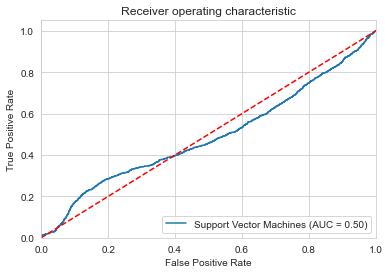

In [59]:
########################### Redes Neuronales Artificiales - Multilayer Perceptron (MLP) ###########################
df = df_pre.copy()
target = 'deposit'

### Seleccionamos las features (X) y el target (y)
X = df.drop(target, axis = 'columns')
y = df.loc[:,target]

### Dividir los datos en training/test (80-20) con shuffle automático
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) # Realiza un shuffle automático

### Creamos el objeto del modelo específico
svm = SVC(probability=True,random_state=42)

### Entrenamos el modelo con los datos conocidos
svm.fit(X_train,y_train)

### Predecimos con los datos a futuro (datos nunca vistos)
y_pred = svm.predict(X_test)

### Visualizamos los resultados del modelo
print_model_report('Support Vector Machines', svm)

### Almacenamos la métrica del modelo
auc_svm = aucscore(svm)


### Ajustando/Tuneando  SVM

#### Entrenar SVMs es muuuuuy cosotoso !!! Por ello la siguiente celda está comentada

In [ ]:
# Selección de los mejores hiperparámetros
## Modelo por defecto:

# SVC(C=1.0, 
#     kernel=’rbf’, 
#     degree=3, 
#     gamma=’auto_deprecated’, 
#     coef0=0.0, 
#     shrinking=True, 
#     probability=False, 
#     tol=0.001, 
#     cache_size=200, 
#     class_weight=None, 
#     verbose=False, 
#     max_iter=-1, d
#     ecision_function_shape=’ovr’, 
#     random_state=None
#    )


####### Requiere mucho tiempo de entrenamiento

# svm = SVC(probability=True, kernel = 'linear' )
# svm.fit(X_train,y_train)
# y_pred = svm.predict(X_test)
# name = "nn(identity): "
# print('AUC de '+name + str(aucscore(svm)))

# svm = SVC(probability=True, kernel = 'rbf' )
# svm.fit(X_train,y_train)
# y_pred = svm.predict(X_test)
# name = "nn(identity): "
# print('AUC de '+name + str(aucscore(svm)))

# svm = SVC(probability=True, kernel = 'poly' )
# svm.fit(X_train,y_train)
# y_pred = svm.predict(X_test)
# name = "nn(identity): "
# print('AUC de '+name + str(aucscore(svm)))

# (IV) COLECTIVIDADES (ENSEMBLES)

# RANDOM FOREST

In [60]:
#### Importar la librería 
from sklearn.ensemble import RandomForestClassifier


 Informe de Resultados del modelo: Random Forest 


 Precisión del modelo:

Accuracy de Random Forest en train: 0.8869719205828689
Accuracy de Random Forest en test: 0.88

 Matriz de confusión:

                 Predicted Negative  Predicted Positive
Actual Negative                7815                 137
Actual Positive                 909                 182

 Resultados: 

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.57      0.17      0.26      1091

    accuracy                           0.88      9043
   macro avg       0.73      0.57      0.60      9043
weighted avg       0.86      0.88      0.86      9043


 Curva ROC: 



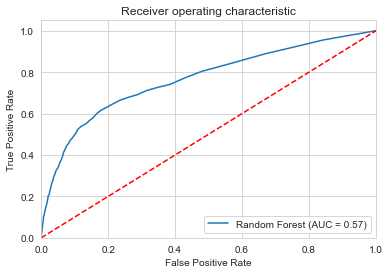

In [61]:
########################### Random Forest ###########################
df = df_pre.copy()
target = 'deposit'

### Seleccionamos las features (X) y el target (y)
X = df.drop(target, axis = 'columns')
y = df.loc[:,target]

### Dividir los datos en training/test (80-20) con shuffle automático
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) # Realiza un shuffle automático

### Creamos el objeto del modelo específico
rf = RandomForestClassifier()

### Entrenamos el modelo con los datos conocidos
rf.fit(X_train,y_train)

### Predecimos con los datos a futuro (datos nunca vistos)
y_pred = rf.predict(X_test)

### Visualizamos los resultados del modelo
print_model_report('Random Forest', rf)

### Almacenamos la métrica del modelo
auc_rf = aucscore(rf)


# (5) MEJORAR LOS RESULTADOS

## Ingeniería de features: One hot encoding, new variables...

## Ajuste de hiperparámetros automático: GridSearchCV

In [62]:
# 1) Elejir el modelo de clasificación

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=100)

# 2) Definir el espacio de búsqueda de hiperparámetros (Todos los valores que se quieren probar)

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

#3) Ejecutar la búsqueda de hiperparámetros:
# Nota: El parámetro n_jobs define cuántos núcleos de CPU de la máquina se van a utilizar
# Nota: el parámetro cv define el número de splits para la validación cruzada

from sklearn.model_selection import GridSearchCV



################### Rellenar el comando GidsearchCV 

clf = GridSearchCV(mlp,parameter_space,n_jobs=-1,cv=3)

clf.fit(X_train, y_train)

# 4) Visualizar el mejor resultado obtenido

# Mejor set de hiperparámetros
print(BOLD +'Mejor combinación de hiperparámetros:\n'+ NO_BOLD, clf.best_params_)


# Visualizar todos los resultados
print(BOLD + '\n Todos los resultados calculados: \n'+ NO_BOLD)
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    
# 5) Realizar predicciones con el mejor set de hiperparámetros

#clf_best = clf.best_estimator_
#y_pred = clf_best.predict(X_test)

# Visualizamos los resultados del modelo
#print_model_report('Neural Network', clf)

KeyboardInterrupt: 

In [ ]:
clf_best = clf.best_estimator_
y_pred = clf_best.predict(X_test)

# Visualizamos los resultados del modelo
print_model_report('Best Neural Network', clf_best)

# PRESENTAR LOS RESULTADOS DE CLASIFICACIÓN

In [63]:
model_names = ['Reg. Logística','Knn','Naive Bayes','Árbol Decisión', 'Red Neuronal', 'SVM', 'Random Forest']
auc_metrics = [auc_reglog, auc_knn, auc_nb, auc_Dec_tree, auc_nn, auc_svm, auc_rf]
df_clf_metrics = pd.DataFrame({'Model name':model_names,
                               'AUC':auc_metrics     
                                })
df_clf_metrics

Model name       AUC
0  Reg. Logística  0.503065
1             Knn  0.547748
2     Naive Bayes  0.613474
3  Árbol Decisión  0.500000
4    Red Neuronal  0.555764
5             SVM  0.500000
6   Random Forest  0.574796

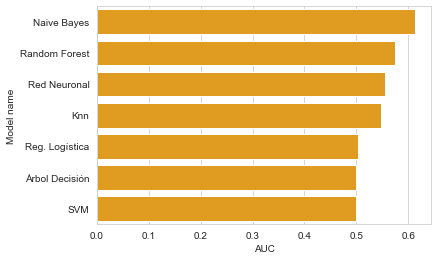

In [64]:
# Mostrar las métricas obtenidas por cada modelo

df_clf_metrics = df_clf_metrics.sort_values(by='AUC', ascending = False)
sns.barplot( df_clf_metrics.AUC,df_clf_metrics['Model name'], orient = 'h', color='orange')